<a href="https://colab.research.google.com/github/surabhipandey18/Optimizers/blob/main/AdamWcifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#load dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train/225.0 , x_test/225.0

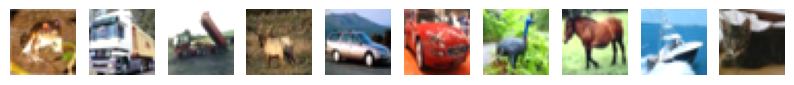

In [14]:
#show some images
plt.figure(figsize=(10,6))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()

In [15]:
#model building
def build_model(optimizer):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPool2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPool2D((2 ,2)),
        layers.Conv2D(64, (2, 2), activation='relu'),

        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [16]:
optimizers = [('AdamW', AdamW(learning_rate=1e-3, weight_decay=1e-3)), ('Adam', Adam(learning_rate=1e-3))]
histories = {}

In [17]:
for name, optimizer in optimizers:
    print(f"\n training with {name} optimizer")
    with tf.device('/GPU:0'):
      model = build_model(optimizer)
      plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)
      history = model.fit(x_train, y_train, epochs= 10, batch_size= 16, validation_split = 0.1, verbose= 1)
      histories[name] = history

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



 training with AdamW optimizer
Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - accuracy: 0.3710 - loss: 1.7184 - val_accuracy: 0.5614 - val_loss: 1.2506
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.5965 - loss: 1.1315 - val_accuracy: 0.6508 - val_loss: 1.0007
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6583 - loss: 0.9648 - val_accuracy: 0.6516 - val_loss: 0.9793
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6961 - loss: 0.8648 - val_accuracy: 0.6722 - val_loss: 0.9267
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7240 - loss: 0.7780 - val_accuracy: 0.7060 - val_loss: 0.8515
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7526 - loss: 0.7014 - val_accuracy: 0.6806 - val_loss: 0.9203
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7738 - loss: 0.6392 - val_accuracy: 0.7084 - val_loss: 0.8817
Epoch 8/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/st

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.3601 - loss: 1.7203 - val_accuracy: 0.5602 - val_loss: 1.2351
Epoch 2/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.5901 - loss: 1.1595 - val_accuracy: 0.6462 - val_loss: 1.0121
Epoch 3/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6541 - loss: 0.9822 - val_accuracy: 0.6542 - val_loss: 0.9909
Epoch 4/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.6937 - loss: 0.8690 - val_accuracy: 0.6876 - val_loss: 0.8991
Epoch 5/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7260 - loss: 0.7772 - val_accuracy: 0.7036 - val_loss: 0.8584
Epoch 6/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7451 - loss: 0.7242 - val_accuracy: 0.7028 - val_loss: 0.8784
Epoch 7/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7678 - loss: 0.6657 - val_accuracy: 0.7048 - val_loss: 0.8940
Epoch 8/10
2813/2813 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.7819 - loss: 0.61

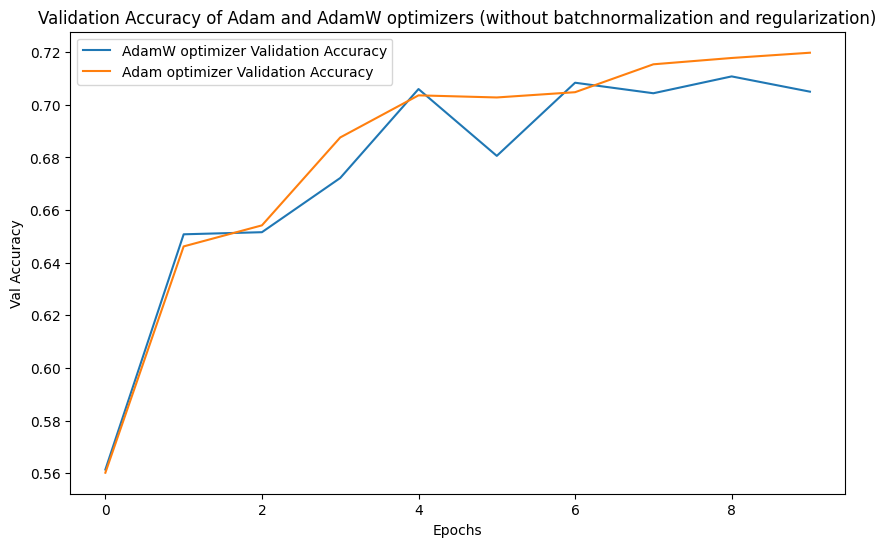

In [18]:
#figure of different optimizers working
plt.figure(figsize=(10, 6))
for name, optimizer in optimizers:
    plt.plot(histories[name].history['val_accuracy'], label=f"{name} optimizer Validation Accuracy")
plt.title("Validation Accuracy of Adam and AdamW optimizers (without batchnormalization and regularization)")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

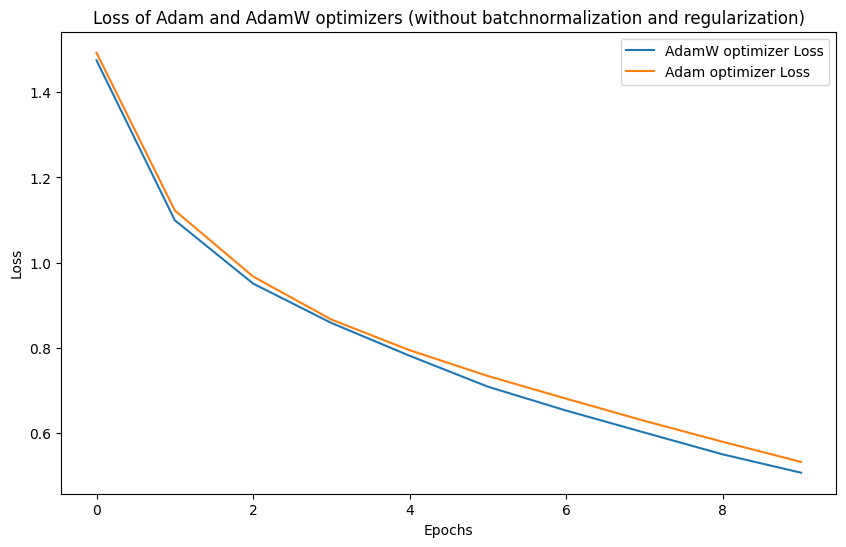

In [19]:
#figure of different loss of optimizers
plt.figure(figsize=(10, 6))
for name, optimizer in optimizers:
    plt.plot(histories[name].history['loss'], label=f"{name} optimizer Loss")
plt.title("Loss of Adam and AdamW optimizers (without batchnormalization and regularization)")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [20]:
#tabulating all
for name, optimizer in optimizers:
    val_accuracy = histories[name].history['val_accuracy'][-1]
    loss = histories[name].history['loss'][-1]
    print(f"{name} → Val Accuracy: {val_accuracy:.4f}, Val Loss: {loss:.4f}")

AdamW → Val Accuracy: 0.7050, Val Loss: 0.5075
Adam → Val Accuracy: 0.7198, Val Loss: 0.5329
